In [1]:
import pandas as pd
aggregated_data = pd.read_csv('aggregated_data.csv')

#### ARIMA/SARIMAX

##### Forecast Using ARIMA

/Users/mizero/anaconda3/envs/PrescriptiveAnalytics/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/mizero/anaconda3/envs/PrescriptiveAnalytics/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/mizero/anaconda3/envs/PrescriptiveAnalytics/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Revenue   No. Observations:                 1815
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -16386.814
Date:                Sat, 14 Dec 2024   AIC                          32779.628
Time:                        11:47:27   BIC                          32796.138
Sample:                    01-01-2018   HQIC                         32785.720
                         - 12-20-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3684      0.016     22.942      0.000       0.337       0.400
ma.L1         -0.9739      0.007   -142.620      0.000      -0.987      -0.960
sigma2      4.106e+06   1.53e+04    268.234      0.0

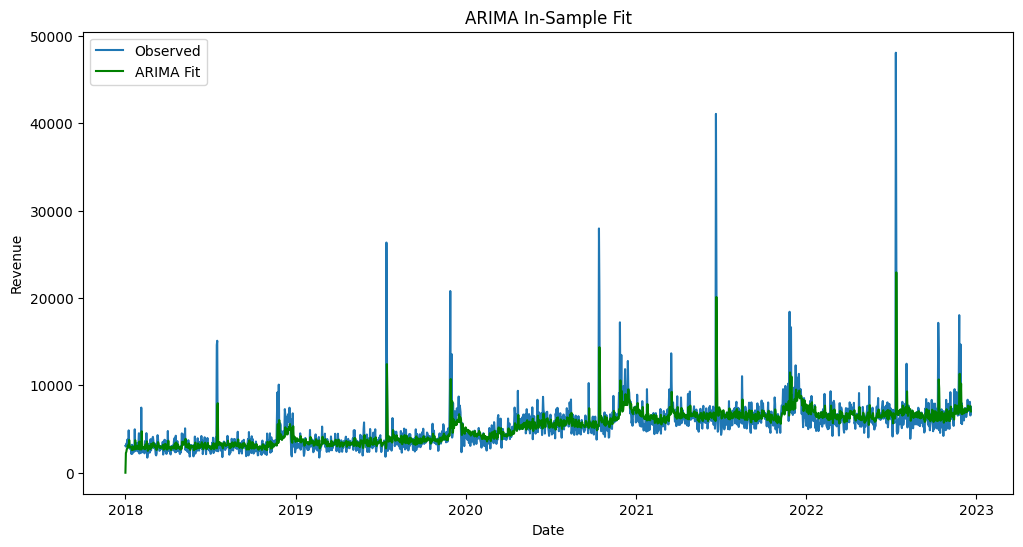

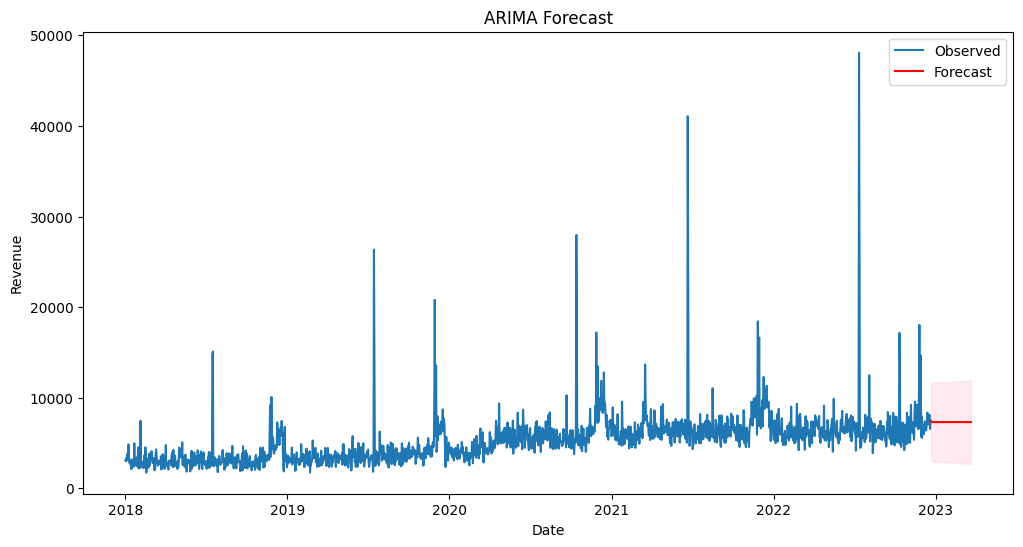

Mean Absolute Error (MAE): 959.71
Root Mean Squared Error (RMSE): 2027.40
Mean Absolute Percentage Error (MAPE): 17.78%
                 Date     Forecast     Lower CI      Upper CI
2022-12-21 2022-12-21  7394.110584  3422.389476  11365.831691
2022-12-22 2022-12-22  7343.223851  3073.579046  11612.868657
2022-12-23 2022-12-23  7324.477232  3000.861275  11648.093190
2022-12-24 2022-12-24  7317.570998  2979.434262  11655.707734
2022-12-25 2022-12-25  7315.026748  2970.561312  11659.492184
...               ...          ...          ...           ...
2023-03-17 2023-03-17  7313.542743  2719.886380  11907.199107
2023-03-18 2023-03-18  7313.542743  2716.949696  11910.135791
2023-03-19 2023-03-19  7313.542743  2714.014887  11913.070600
2023-03-20 2023-03-20  7313.542743  2711.081950  11916.003537
2023-03-21 2023-03-21  7313.542743  2708.150880  11918.934607

[91 rows x 4 columns]


In [2]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

aggregated_data['Order Date'] = pd.to_datetime(aggregated_data['Order Date'])
aggregated_data.set_index('Order Date', inplace=True)
aggregated_data = aggregated_data.sort_index()

# Fit ARIMA Model
model = ARIMA(aggregated_data["Revenue"], order=(1, 1, 1))  # p, d, q
result = model.fit()

# Summary of the model
print(result.summary())

# Generate in-sample predictions
in_sample_predictions = result.predict(start=0, end=len(aggregated_data)-1)

# Forecast steps
days_in_month = 365 / 12
forecast_steps = int(3 * days_in_month)  # Forecast for 3 months

# Forecast
forecast = result.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot the original data and the ARIMA in-sample predictions using Matplotlib
plt.figure(figsize=(12, 6))
plt.plot(aggregated_data.index, aggregated_data["Revenue"], label="Observed")
plt.plot(aggregated_data.index, in_sample_predictions, label="ARIMA Fit", color='green')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('ARIMA In-Sample Fit')
plt.legend()
plt.show()

# Plot the original data and the ARIMA forecast using Matplotlib
plt.figure(figsize=(12, 6))
plt.plot(aggregated_data.index, aggregated_data["Revenue"], label="Observed")
forecast_index = pd.date_range(start=aggregated_data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')
plt.plot(forecast_index, forecast_values, label="Forecast", color='red')
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

# Show a table of the 3-month forecast values including the dates
forecast_df = pd.DataFrame({
    'Date': forecast_index,
    'Forecast': forecast_values,
    'Lower CI': conf_int.iloc[:, 0],
    'Upper CI': conf_int.iloc[:, 1]
})
print(forecast_df)

# Evaluate the model
mae = mean_absolute_error(aggregated_data["Revenue"], in_sample_predictions)
rmse = np.sqrt(mean_squared_error(aggregated_data["Revenue"], in_sample_predictions))
mape = mean_absolute_percentage_error(aggregated_data["Revenue"], in_sample_predictions)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2%}")

##### Forecast Using SARIMAX

/Users/mizero/anaconda3/envs/PrescriptiveAnalytics/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/mizero/anaconda3/envs/PrescriptiveAnalytics/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.38986D+00    |proj g|=  8.62803D-02

At iterate    5    f=  8.31623D+00    |proj g|=  2.07156D-02

At iterate   10    f=  8.30649D+00    |proj g|=  1.66918D-03

At iterate   15    f=  8.30591D+00    |proj g|=  5.37504D-03

At iterate   20    f=  8.30132D+00    |proj g|=  1.42351D-02

At iterate   25    f=  8.28233D+00    |proj g|=  1.02942D-01

At iterate   30    f=  8.20850D+00    |proj g|=  6.27232D-02

At iterate   35    f=  8.18150D+00    |proj g|=  1.77560D-02

At iterate   40    f=  8.18083D+00    |proj g|=  6.27858D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

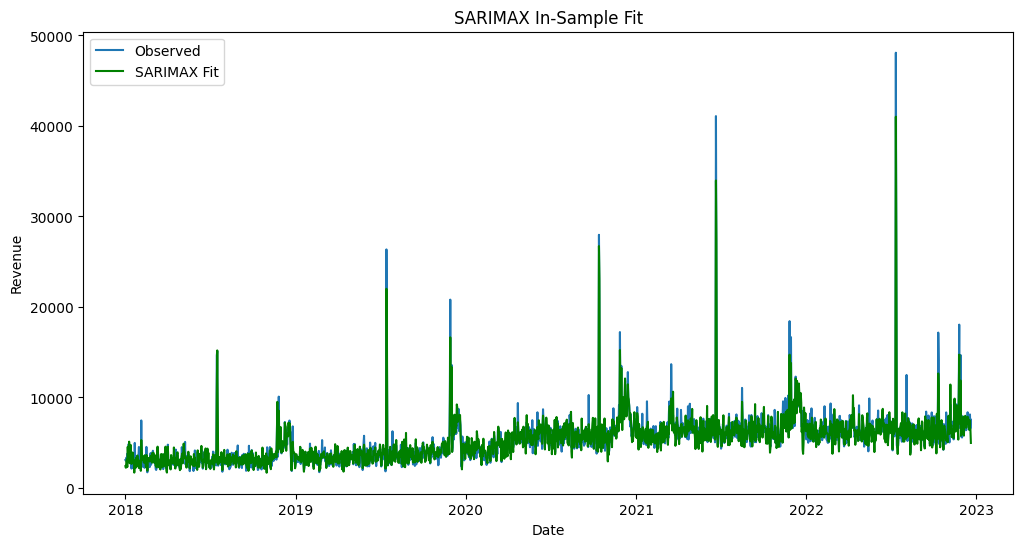

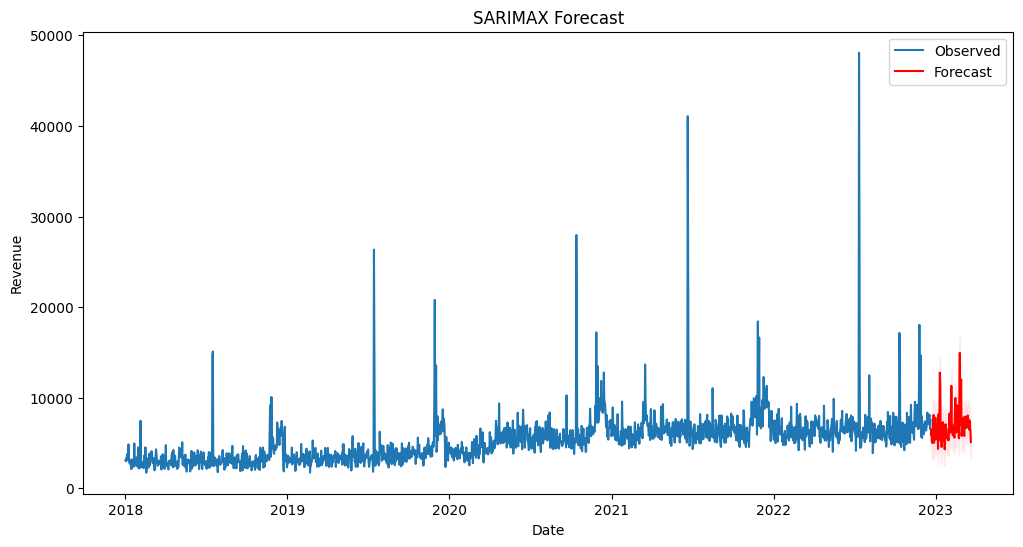

                 Date     Forecast     Lower CI     Upper CI
2022-12-21 2022-12-21  5938.813302  4193.065971  7684.560633
2022-12-22 2022-12-22  6525.594707  4778.979634  8272.209781
2022-12-23 2022-12-23  5187.829130  3441.212185  6934.446075
2022-12-24 2022-12-24  5003.372469  3256.755490  6749.989448
2022-12-25 2022-12-25  5383.593127  3636.976147  7130.210107
...               ...          ...          ...          ...
2023-03-17 2023-03-17  6482.001646  4690.631308  8273.371984
2023-03-18 2023-03-18  7493.165300  5701.794958  9284.535642
2023-03-19 2023-03-19  6718.379211  4927.008869  8509.749554
2023-03-20 2023-03-20  6413.159707  4621.789364  8204.530050
2023-03-21 2023-03-21  5105.384141  3314.013797  6896.754484

[91 rows x 4 columns]
Mean Absolute Error (MAE): 619.22
Root Mean Squared Error (RMSE): 894.41
Mean Absolute Percentage Error (MAPE): 12.05%


In [7]:
# Fit SARIMAX Model with exogenous variables
exog_vars = aggregated_data[["prime_proportion", "Prime Purchase", "Prime Customer"]]
model = SARIMAX(aggregated_data["Revenue"], 
                order=(1, 1, 1),  # p, d, q
                seasonal_order=(1, 1, 1, 7),  # P, D, Q, s
                exog=exog_vars)  # Exogenous variables
result = model.fit()

# Summary of the model
print(result.summary())

# Generate in-sample predictions
in_sample_predictions = result.predict(start=0, end=len(aggregated_data)-1, exog=exog_vars)

# Forecast steps
days_in_month = 365 / 12
forecast_steps = int(3 * days_in_month)  # Forecast for 3 months

# Forecast
exog_forecast = exog_vars.iloc[-forecast_steps:].copy()
forecast = result.get_forecast(steps=forecast_steps, exog=exog_forecast)
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot the original data and the SARIMAX in-sample predictions using Matplotlib
plt.figure(figsize=(12, 6))
plt.plot(aggregated_data.index, aggregated_data["Revenue"], label="Observed")
plt.plot(aggregated_data.index, in_sample_predictions, label="SARIMAX Fit", color='green')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('SARIMAX In-Sample Fit')
plt.legend()
plt.show()

# Plot the original data and the SARIMAX forecast using Matplotlib
plt.figure(figsize=(12, 6))
plt.plot(aggregated_data.index, aggregated_data["Revenue"], label="Observed")
forecast_index = pd.date_range(start=aggregated_data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')
plt.plot(forecast_index, forecast_values, label="Forecast", color='red')
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('SARIMAX Forecast')
plt.legend()
plt.show()

# Show a table of the 3-month forecast values including the dates
forecast_df = pd.DataFrame({
    'Date': forecast_index,
    'Forecast': forecast_values,
    'Lower CI': conf_int.iloc[:, 0],
    'Upper CI': conf_int.iloc[:, 1]
})
print(forecast_df)

# Evaluate the model
mae = mean_absolute_error(aggregated_data["Revenue"], in_sample_predictions)
rmse = np.sqrt(mean_squared_error(aggregated_data["Revenue"], in_sample_predictions))
mape = mean_absolute_percentage_error(aggregated_data["Revenue"], in_sample_predictions)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2%}")